## Multi-Agent system with LangGraph

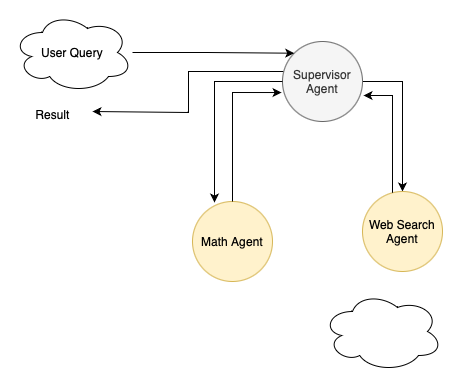

In [4]:
from langchain_openai import ChatOpenAI
from langgraph_supervisor import create_supervisor
from langgraph.prebuilt import create_react_agent

In [5]:
model = ChatOpenAI(model="gpt-4o")

In [6]:
def add(a: float, b: float) -> float:
    """
        Add two numbers
    """
    return a+b

In [14]:
def multiply(a: float, b: float) -> float:
    """ 
        Multiply two numbers
    """
    return a*b

In [15]:
from langchain.tools import DuckDuckGoSearchResults

In [16]:
web_tool = DuckDuckGoSearchResults(num_results=5)

In [10]:
!pip install duckduckgo-search

  Using cached lxml-5.3.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (3.6 kB)
Using cached lxml-5.3.2-cp311-cp311-macosx_10_9_x86_64.whl (4.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 7.9 MB/s eta 0:00:00a 0:00:01


In [17]:
def web_search(query: str) -> str:
    """
        Search the web for information 
    """
    result = web_tool.invoke(query)
    return result

In [18]:
math_agent = create_react_agent(
    model= model, 
    tools=[add, multiply],
    name="math_expert",
    prompt="You  are a math expert, Always use one tool at a time"
)

In [19]:
research_agent = create_react_agent(
    model=model,
    tools=[web_search],
    name="research_expert",
    prompt="You are  a world class researcher with acces to web search. Do not do any math"
)

In [20]:
workflow = create_supervisor(
    [research_agent, math_agent],
    model=model, 
    prompt=(
        "You are a team supervisor managing research and math expert"
        "For current events, use research agent"
        "for math problems, use math agent"
    )
)

In [21]:
app = workflow.compile()

In [22]:
result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "Find the total population of India and total population of USA and calculate the total population"
        }
    ]
})

In [23]:
result

{'messages': [HumanMessage(content='Find the total population of India and total population of USA and calculate the total population', additional_kwargs={}, response_metadata={}, id='6c0656bc-3907-4e17-beb1-185b7c8da522'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jFORMvOh88Tyc8pKgaC9Rngt', 'function': {'arguments': '{}', 'name': 'transfer_to_research_expert'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 107, 'total_tokens': 122, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_85bc8e3fae', 'id': 'chatcmpl-BNY9UaiI0mx32hqMrkRejH4JcsOF4', 'finish_reason': 'tool_calls', 'logprobs': None}, name='supervisor', id='run-7a4eedf6-fdcb-40a0-9207-c250fbe6b219-0', tool_calls=[{'nam